In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
import mlp
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.neural_network import MLPClassifier

In [28]:
seed_number = 1
np.random.seed(seed_number)

### Classification

In [110]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=seed_number, n_clusters_per_class=1)

In [120]:
y = y.reshape(100, 1)

In [114]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hidden_size = 4
result = {}
max_iter = 30000

for alpha in alphas:
    print('Training MLP with learning rate: {}'.format(alpha))
    result[alpha] = mlp.train(X, y, hidden_size, alpha=alpha, num_iter=30000)

Training MLP with learning rate: 0.001
Training MLP with learning rate: 0.01
Training MLP with learning rate: 0.1
Training MLP with learning rate: 1
Training MLP with learning rate: 10
Training MLP with learning rate: 100
Training MLP with learning rate: 1000


/home/amir/code/neural-network-playground/mlp.py:7: RuntimeWarning: overflow encountered in exp
  output = 1/(1+np.exp(-x))


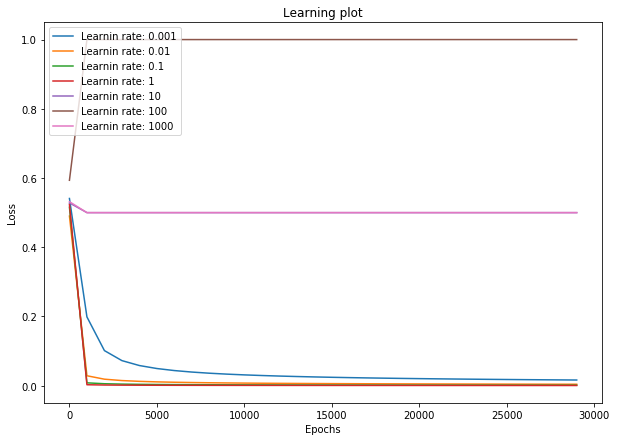

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

_iter = np.arange(0, 30000, 1000)

for alpha in alphas:
    ax.plot(_iter, result[alpha]['loss'], label='Learnin rate: {}'.format(alpha))

ax.legend()

ax.set_title('Learning plot')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

plt.savefig('learning_plot.eps', format='eps')

plt.show()

/home/amir/code/neural-network-playground/mlp.py:7: RuntimeWarning: overflow encountered in exp
  output = 1/(1+np.exp(-x))


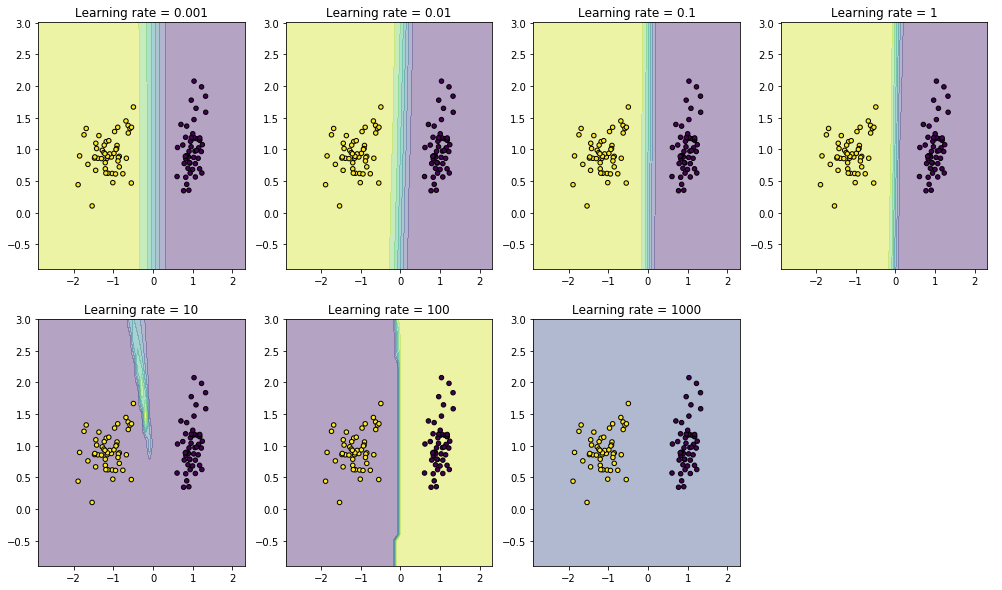

In [140]:
fig, ax = plt.subplots(2, 4, figsize=(17, 10))
ax = ax.ravel()
i = 0

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
decision_plate = np.c_[xx.ravel(), yy.ravel()]

for alpha in alphas:
    _, Z = mlp.forward_propagation(decision_plate, result[alpha]['w_0'], result[alpha]['w_1'])
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, alpha=0.4)
    ax[i].scatter(X[:, 0], X[:, 1], c=y.flatten(), s=20, edgecolor='k')
    ax[i].set_title('Learning rate = {}'.format(alpha))

    i += 1

ax[7].axis('off')
plt.savefig('np_implementation.png', dpi=600, format='png')
plt.show()

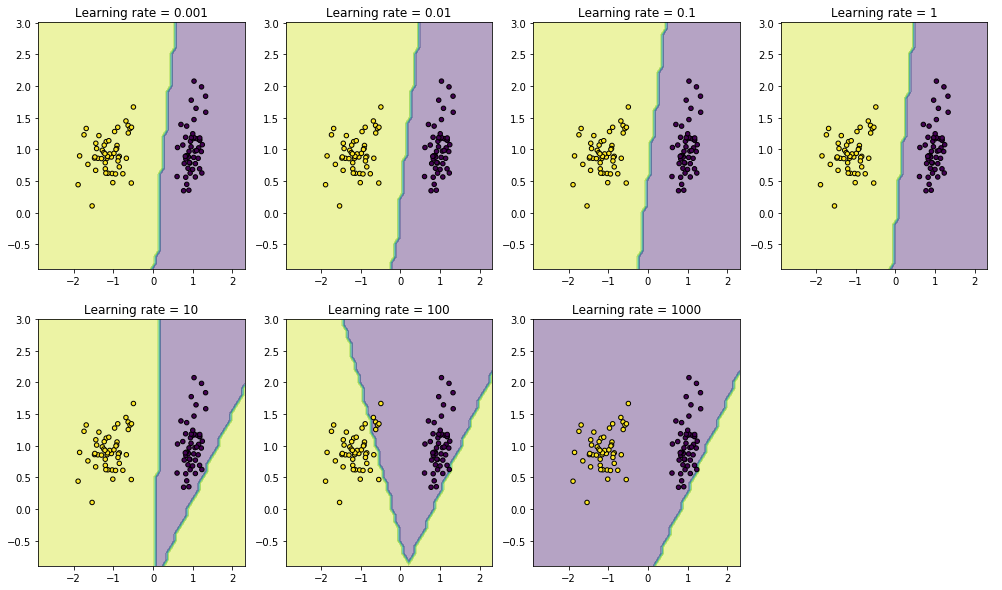

In [141]:
fig, ax = plt.subplots(2, 4, figsize=(17, 10))
ax = ax.ravel()
i = 0

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
decision_plate = np.c_[xx.ravel(), yy.ravel()]

for alpha in alphas:
    clf = MLPClassifier(learning_rate_init=alpha, solver='sgd', alpha=0,
                    hidden_layer_sizes=(hidden_size,), random_state=1, max_iter=30000, batch_size=X.shape[0])
    clf.fit(X, y.ravel())
    Z = clf.predict(decision_plate)
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, alpha=0.4)
    ax[i].scatter(X[:, 0], X[:, 1], c=y.flatten(), s=20, edgecolor='k')
    ax[i].set_title('Learning rate = {}'.format(alpha))

    i += 1

ax[7].axis('off')
plt.savefig('sklearn.png', dpi=600, format='png')

plt.show()

### XOR

In [147]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X, y)

In [158]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [159]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
X.shape

(4, 2)

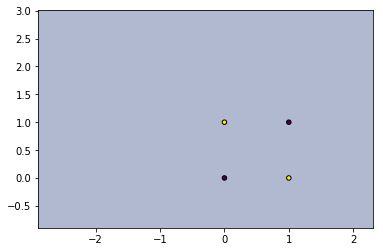

In [161]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

Z = clf.predict(decision_plate)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=20, edgecolor='k')
plt.show()